# Analysis of ECoG decoding via sliding window

This notebook describes the ECoG sliding-window decoding results reported in the manuscript "Evidence for a deep, distributed, and dynamic semantic code in human anterior temporal cortex" archived at: https://www.biorxiv.org/content/10.1101/695049v1.abstract

## Required libraries

In [1]:
library(lsa) #provides cosine distance functions
library(fields) #provides image.plot function

Loading required package: SnowballC
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.4-0 (2019-11-01) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps
See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 


## Load custom functions

These functions are used to generate the plots in the paper.

In [13]:
get.clust <- dget("get_clust.r") #Clusters data
plot.clacc <- dget("plot_clacc.r")  #Plots mean accuracy for each cluster of models
plot.cbars <- dget("plot_cbars.r")  #Plot amount of time each cluster of models performs above chance


## Read decoding data

Decoding data for each participant is stored in the subdirectory SubjectData. Each is a csv file in which rows correspond to a decoding model trained on a given time window and columns correspond to the time-window in which the model was tested. The data for each participant are loaded as elements in a list. We then compute the mean accuracy for each matrix element across the 8 participants.

In [7]:
f <- list.files(path = "./SubjectData/") #Get filenames
f <- paste("./SubjectData/", f, sep="")  #Append path
nsjs <- length(f) #number of subjects

acclist <- list() #Initialize list to contain each participant's data

#Loop to read data
for(i1 in c(1:nsjs)){
    acclist[[i1]] <- as.matrix(read.csv(f[i1], header = F))
    }

#acclist now contains data for each participant

accmean <- acclist[[1]] #initialize this with first subject's of data
for(i1 in c(2:nsjs)) accmean <- accmean + acclist[[i1]] #Add each subject's data
accmean <- accmean/nsjs #Divide by number of participants



## Generate plots

First we look at the average prediction accuracy for each of the 163 models across all time-windows, as an image heat-plot (manuscript Figure 4B). We use the image.plot function from the fields package. The matrix indexing generates the image plot so that time increases right-to-left and top-to-bottom in the plot.

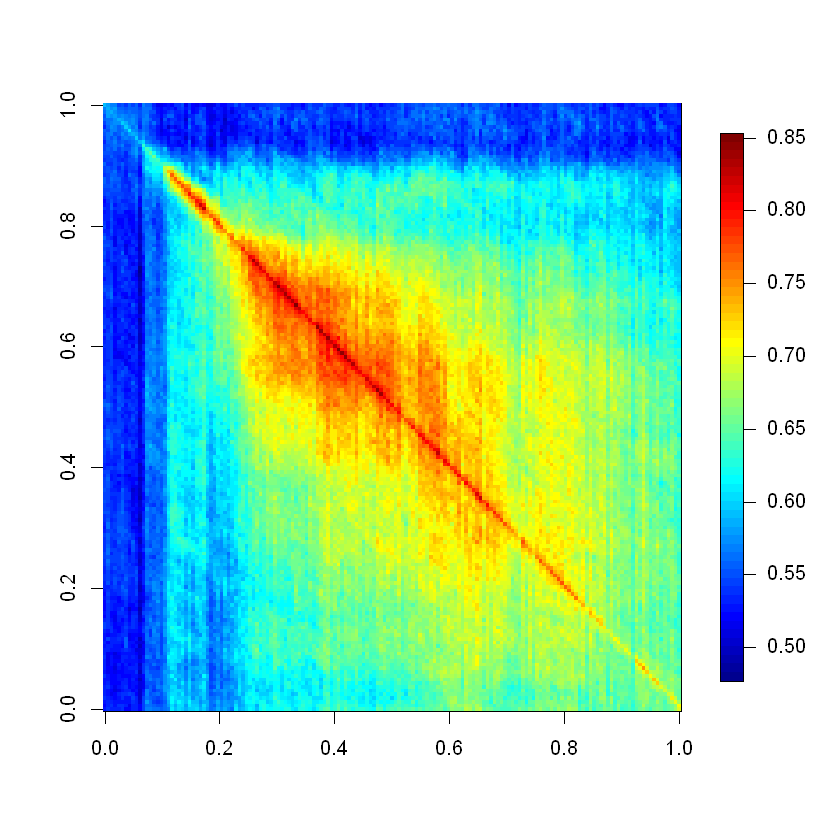

In [8]:
image.plot(accmean[,164:1])

Next we cluster the rows of the matrix (the different decoding models) on the basis of the similarities of their decoding profiles over time and plot the mean decoding accuracy over time for each cluster (see paper; Figure 4C). The plot_clacc.r function is documented in the code comments. Default parameters are those reported in the paper.

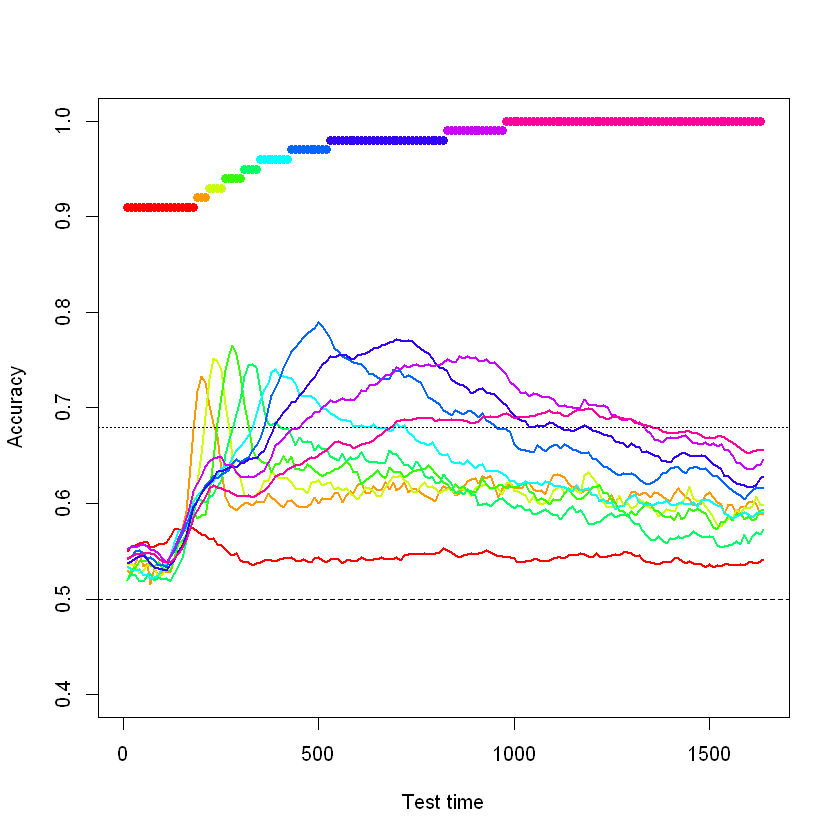

In [10]:
plot.clacc(accmean)

Finally we plot the amount of time each cluster of classifiers shows above-threshold classification accuracy, where the threshold is determined by Bonferonni-corrected signifiance threshold on the binomial distribution. Again the script paramters are explained in the code comments; defaults correspond to those used in the paper.

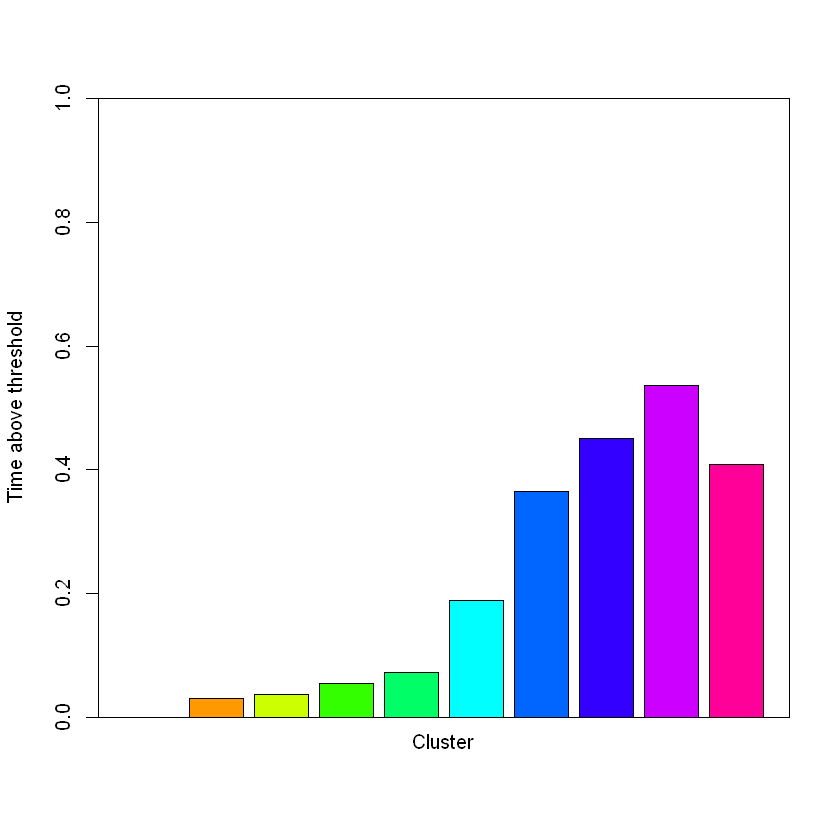

In [14]:
plot.cbars(accmean)